In [1]:
import pandas as pd
import numpy as np 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_parquet('soccer.parquet 1')

In [3]:
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   183978 non-null  int64  
 1   player_api_id        183978 non-null  int64  
 2   date                 183978 non-null  object 
 3   overall_rating       183142 non-null  float64
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

In [5]:
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking                 True
standing_tackl

In [6]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [7]:
data = data.dropna()

In [8]:
data = data.iloc[:10000]
len(data)

10000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10179
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_fifa_api_id   10000 non-null  int64  
 1   player_api_id        10000 non-null  int64  
 2   date                 10000 non-null  object 
 3   overall_rating       10000 non-null  float64
 4   potential            10000 non-null  float64
 5   preferred_foot       10000 non-null  object 
 6   attacking_work_rate  10000 non-null  object 
 7   defensive_work_rate  10000 non-null  object 
 8   crossing             10000 non-null  float64
 9   finishing            10000 non-null  float64
 10  heading_accuracy     10000 non-null  float64
 11  short_passing        10000 non-null  float64
 12  volleys              10000 non-null  float64
 13  dribbling            10000 non-null  float64
 14  curve                10000 non-null  float64
 15  free_kick_accuracy   10000 non-null 

In [10]:
X = data.drop(['date','preferred_foot','attacking_work_rate','defensive_work_rate'], axis = 1)
y = data['preferred_foot']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [13]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [14]:
score = []

X_trains = [X_train, X_train_norm, X_train_stand]
X_tests = [X_test, X_test_norm, X_test_stand]


In [15]:
for X_train_set, X_test_set in zip(X_trains, X_tests):
    svc = SVC()
    
    svc.fit(X_train_set, y_train)
    y_pred = svc.predict(X_test_set)
    
    score.append(accuracy_score(y_test, y_pred))

In [16]:
pd.DataFrame({'Accuracy':score}, index=['Original', 'Normalized', 'Standardized'])

,Accuracy
Original,0.7792
Normalized,0.8452
Standardized,0.8900


In [17]:
svc = SVC()
svc.fit(X_train_stand, y_train)

perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean

array([0.01328, 0.01312, 0.0036 , 0.00712, 0.0256 , 0.01416, 0.00952,
       0.00664, 0.02176, 0.0028 , 0.01432, 0.01592, 0.01248, 0.00288,
       0.00968, 0.0084 , 0.01056, 0.00568, 0.00848, 0.006  , 0.01288,
       0.0116 , 0.00928, 0.0144 , 0.0132 , 0.0096 , 0.00376, 0.01328,
       0.01296, 0.01392, 0.00416, 0.01232, 0.0068 , 0.00576, 0.00208,
       0.00552, 0.00656])

<Axes: >

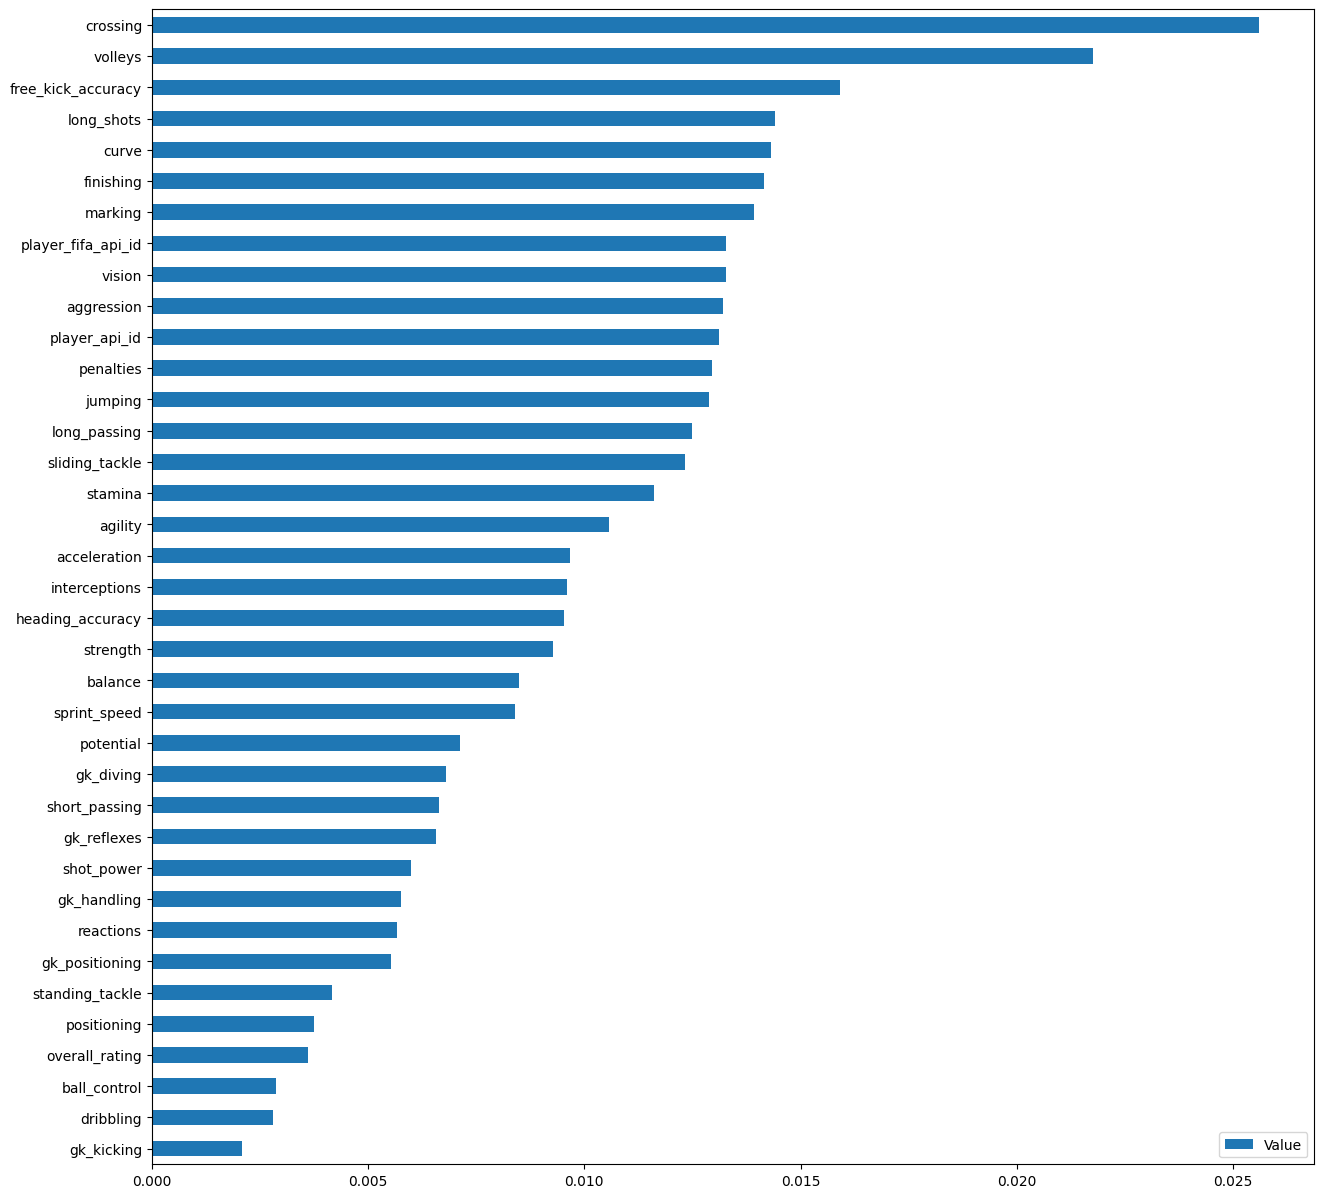

In [18]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh(figsize=(15,15))